In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

#import per la valutazione dei modelli, creazione train test split e cross validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split,cross_val_score

#modelli ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

#LISTA UTILE PER IMPORT DEI MODELLI

#feature selection and data processing
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler, OrdinalEncoder
from sklearn.preprocessing import RobustScaler #when you have many outliers



#classification
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#regression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge #least squares
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

#CV STRATIFICATA

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#CROSS VALIDATE (diversa da cross_val_score)
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion

from sklearn.impute import SimpleImputer #rimuove gli NaN

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler #when you have many outliers

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

from sklearn.pipeline import make_pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import FunctionTransformer

#RANDOM SEARCH PER IPERPARAMETRI

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

#ESEMPIO GRID SEARCH DI IPERPARAMETRI PER IL MODELLO KNN

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve, validation_curve
from scipy.stats import uniform

from sklearn.utils import resample

from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer


In [146]:
df = pd.read_csv('dataset.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [147]:
print(f'Le istanze sono : {df.shape[0]}')
print(f'Valori nulli totali: {df.isnull().sum().sum()}')
print(df.isnull().sum())
print(f'\nÈ bilanciato? : {df['Exited'].value_counts()}')

Le istanze sono : 10000
Valori nulli totali: 0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

È bilanciato? : Exited
0    7963
1    2037
Name: count, dtype: int64


2. Dopo aver discretizzato l’attributo Age in 5 gruppi, verificare se è vero che i clienti più
anziani hanno meno probabilità di abbandonare la banca rispetto ai più giovani. (2 punti)
Considerando i clienti con più di 60 anni, verificare se è vero che maggiore è il saldo (Balance)
e minore è la probabilità che il cliente abbandoni la banca. (2 punti)

In [148]:
df1 = df.copy()
df1['Age'] = pd.cut(df['Age'], bins = 5)

Exited             0     1
Age                       
(17.926, 32.8]  2577   213
(32.8, 47.6]    4465  1035
(47.6, 62.4]     635   716
(62.4, 77.2]     263    72
(77.2, 92.0]      23     1

Normalized
Exited                  0          1
Age                                 
(17.926, 32.8]  92.365591   7.634409
(32.8, 47.6]    81.181818  18.818182
(47.6, 62.4]    47.002221  52.997779
(62.4, 77.2]    78.507463  21.492537
(77.2, 92.0]    95.833333   4.166667


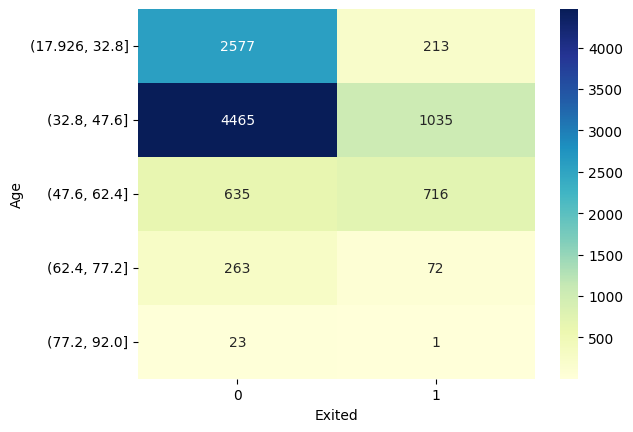

In [149]:
cross = pd.crosstab(df1['Age'], df1['Exited'])
print(cross)
sns.heatmap(cross, annot=True, fmt=".0f", cmap="YlGnBu")
cross = pd.crosstab(df1['Age'], df1['Exited'], normalize='index')
print('\nNormalized')
print(cross*100)

/tmp/ipython-input-939040287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df60['Balance_Group'] = pd.cut(df60['Balance'], bins=5)


Exited                      0   1
Balance_Group                    
(-187.013, 37402.626]     145  24
(37402.626, 74805.252]     15  10
(74805.252, 112207.878]    62  24
(112207.878, 149610.504]   95  51
(149610.504, 187013.13]    32   6

Normalized
Exited                            0          1
Balance_Group                                 
(-187.013, 37402.626]     85.798817  14.201183
(37402.626, 74805.252]    60.000000  40.000000
(74805.252, 112207.878]   72.093023  27.906977
(112207.878, 149610.504]  65.068493  34.931507
(149610.504, 187013.13]   84.210526  15.789474


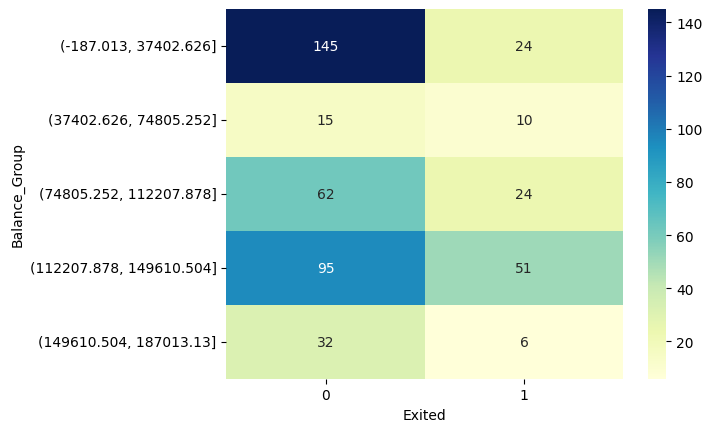

In [150]:
df60 = df[df['Age'] > 60]
df60['Balance_Group'] = pd.cut(df60['Balance'], bins=5)

cross = pd.crosstab(df60['Balance_Group'], df60['Exited'])
print(cross)
sns.heatmap(cross, annot=True, fmt=".0f", cmap="YlGnBu")
cross = pd.crosstab(df60['Balance_Group'], df60['Exited'], normalize='index')
print('\nNormalized')
print(cross*100)

3. Riportare in una pivot table la media di CreditScore raggruppando per uomini e donne
(sulle righe) e i valori di salario stimato discretizzati in 5 gruppi (sulle colonne). Si può dire che i
clienti con CreditScore più elevato sono quelli con il salario più alto? Si notano differenze tra
uomini e donne? (punti 3)

Salary_group  (-188.401, 40007.76]  (40007.76, 80003.94]  \
Gender                                                     
Female                  657.436219            651.474747   
Male                    649.769731            650.378284   

Salary_group  (80003.94, 120000.12]  (120000.12, 159996.3]  \
Gender                                                       
Female                   646.934899             646.401064   
Male                     649.466117             649.247855   

Salary_group  (159996.3, 199992.48]  
Gender                               
Female                   652.440357  
Male                     652.460346  


/tmp/ipython-input-2597109299.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='Gender', columns= 'Salary_group', values = 'CreditScore', aggfunc = 'mean')


<Axes: xlabel='Salary_group', ylabel='Gender'>

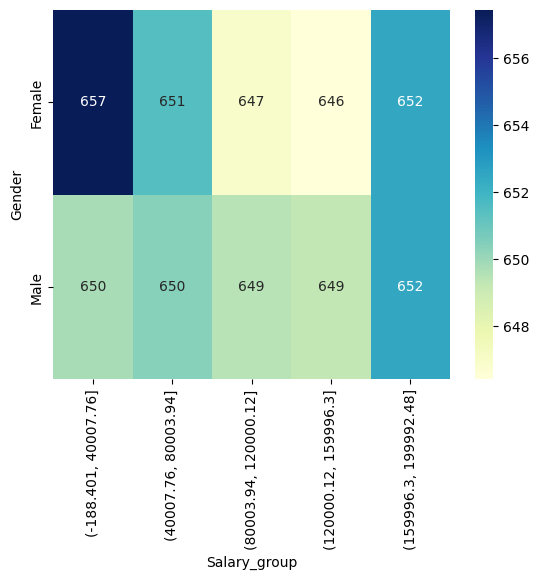

In [151]:
df['Salary_group'] = pd.cut(df['EstimatedSalary'], bins = 5)
pivot = df.pivot_table(index='Gender', columns= 'Salary_group', values = 'CreditScore', aggfunc = 'mean')
print(pivot)
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")

4. Considerando soltanto i clienti che hanno una carta di credito e più di 100000 euro di credito,
confrontare in un istogramma la distribuzione del CreditScore dei clienti francesi e di quelli
spagnoli. Chi ha CreditScore maggiore? (punti 2

Media Credit Score Francia: 653.20, per 1329 clienti
Media Credit Score Spagna: 648.35, per 624 clienti


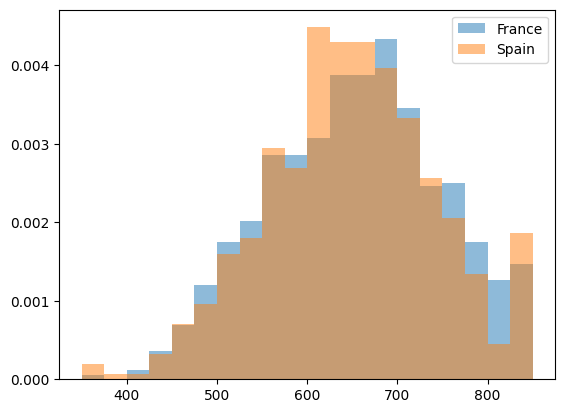

In [152]:
dfcred = df[(df['HasCrCard']== 1) & (df['Balance']>100000)]
fr = dfcred[dfcred['Geography']=='France']
sp = dfcred[dfcred['Geography']=='Spain']

plt.hist(fr['CreditScore'], alpha=0.5, label='France', bins=20, density = True)
plt.hist(sp['CreditScore'], alpha=0.5, label='Spain', bins=20, density = True)
plt.legend()


print(f"Media Credit Score Francia: {fr['CreditScore'].mean():.2f}, per {fr.shape[0]} clienti")
print(f"Media Credit Score Spagna: {sp['CreditScore'].mean():.2f}, per {sp.shape[0]} clienti")


1. Si vuole predire l’abbandono dei clienti della banca. Ricaricare il dataset originale, eliminare
eventuali attributi inutili (giustificare la scelta), eliminare le eventuali istanze che contengono
valori nulli, trasformare opportunamente valori categorici e dividere il dataset in modo che 3/4
degli elementi siano contenuti in un nuovo dataset “train” e 1/4 nel dataset “test” preservando
le proporzioni delle classi nella colonna target.
Allenare il train con il modello DecisionT ree e valutare l’accuratezza ottenuta sia sul dataset
train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una predizione
basata sul modello KNeighborsClassifier . Effettuare alcune considerazioni sui risultati ottenuti,
tenendo in considerazione i valori di accuracy , F1 score, l’analisi della confusion matrix e la
predizione effettuata da un dummy classifier a scelta. (punti 4)

In [153]:
df = pd.read_csv('dataset.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [154]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], inplace = True, axis =1)
df.dropna()
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [155]:
le = LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [156]:
X = df.drop('Exited', axis = 1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify = y)

In [157]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
F1_dt_train = f1_score(y_pred, y_train, average = 'weighted')
acc_dt_train = accuracy_score(y_pred, y_train)
y_pred = dt.predict(X_test)
F1_dt_test = f1_score(y_pred, y_test, average = 'weighted')
acc_dt_test = accuracy_score(y_pred, y_test)

print(f'Per il decision Tree, F1 nel train: {F1_dt_train}, per il test {F1_dt_test}')
print(f'Per il decision Tree, accuracy nel train: {acc_dt_train}, per il test {acc_dt_test}')

print(confusion_matrix(y_pred, y_test))

Per il decision Tree, F1 nel train: 1.0, per il test 0.781881018133438
Per il decision Tree, accuracy nel train: 1.0, per il test 0.7852
[[1700  246]
 [ 291  263]]


In [158]:
kn = KNeighborsClassifier()

kn.fit(X_train, y_train)
y_pred = kn.predict(X_train)
F1_kn_train = f1_score(y_pred, y_train, average = 'weighted')
acc_kn_train = accuracy_score(y_pred, y_train)
y_pred = kn.predict(X_test)
F1_kn_test = f1_score(y_pred, y_test, average = 'weighted')
acc_kn_test = accuracy_score(y_pred, y_test)

print(f'Per il KNeighborsClassifier, F1 nel train: {F1_kn_train}, per il test {F1_kn_test}')
print(f'Per il KNeighborsClassifier, accuracy nel train: {acc_kn_train}, per il test {acc_kn_test}')

print(confusion_matrix(y_pred, y_test))

Per il KNeighborsClassifier, F1 nel train: 0.8523574847978017, per il test 0.797440163243894
Per il KNeighborsClassifier, accuracy nel train: 0.8150666666666667, per il test 0.7524
[[1836  464]
 [ 155   45]]


In [159]:
model = DummyClassifier(strategy = 'stratified')
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
acc_dum_train = accuracy_score(y_pred, y_train)
y_pred = model.predict(X_test)
acc_dum_test = accuracy_score(y_pred, y_test)
print(f'Per il Dummy: Train {acc_dum_train}, Test {acc_dum_test}')

Per il Dummy: Train 0.6789333333333334, Test 0.6708


2. Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza che si ottiene con
una 10 Fold cross validation. (punti 1)

In [160]:
cross = cross_val_score(dt, X, y, cv = 10)
print(f'Per il dt con kfold: {cross}, con media {cross.mean()}')
cross = cross_val_score(kn, X, y, cv = 10)
print(f'Per il kn con kfold: {cross}, con media {cross.mean()}')

Per il dt con kfold: [0.78  0.785 0.805 0.788 0.795 0.782 0.814 0.807 0.78  0.809], con media 0.7945
Per il kn con kfold: [0.765 0.776 0.75  0.77  0.769 0.766 0.766 0.759 0.782 0.761], con media 0.7664000000000001


3. Considerando i dati del test set e utilizzando il modello DecisionT ree, la probabilità di predire
l’abbandono del cliente della banca è la stessa per uomini e donne? (punti 2) Valutare se
l’accuratezza della predizione negli uomini è la stessa ottenuta nelle donne. (punti 2) Come
varia l’accuratezza se elimino l’attributo Gender? (punti 1)

In [161]:
Xfair = X_test.copy()
Xfair['Exited'] =y_test

uomo = Xfair[Xfair['Gender']==1].copy()
donna = Xfair[Xfair['Gender']==0].copy()

prob_uomo = (uomo['Exited'].sum())/uomo.shape[0]
prob_donna = (donna['Exited'].sum())/donna.shape[0]

print(f'Prob uomo: {prob_uomo}')
print(f'Prob donna: {prob_donna}')

Prob uomo: 0.16251830161054173
Prob donna: 0.25308641975308643


In [162]:
Xu = uomo.drop('Exited', axis =1)
yu= uomo['Exited']
y_pred = dt.predict(Xu)
acc_u = accuracy_score(y_pred, yu)
print(f'Uomo: {acc_u}')

Xd = donna.drop('Exited', axis =1)
yd= donna['Exited']
y_pred = dt.predict(Xd)
acc_d = accuracy_score(y_pred, yd)
print(f'Donna: {acc_d}')


Uomo: 0.8038067349926794
Donna: 0.7627865961199295


In [163]:
X_train.drop('Gender', axis = 1, inplace = True)
X_test.drop('Gender', axis = 1, inplace = True)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
F1_dt_train = f1_score(y_pred, y_train, average = 'weighted')
acc_dt_train = accuracy_score(y_pred, y_train)
y_pred = dt.predict(X_test)
F1_dt_test = f1_score(y_pred, y_test, average = 'weighted')
acc_dt_test = accuracy_score(y_pred, y_test)

print(f'Per il decision Tree, F1 nel train: {F1_dt_train}, per il test {F1_dt_test}')
print(f'Per il decision Tree, accuracy nel train: {acc_dt_train}, per il test {acc_dt_test}')

print(confusion_matrix(y_pred, y_test))

Per il decision Tree, F1 nel train: 1.0, per il test 0.7724984920590147
Per il decision Tree, accuracy nel train: 1.0, per il test 0.7772
[[1681  247]
 [ 310  262]]


4. A partire dal dataset iniziale (in cui sono stati eliminati eventuali attributi inutili ed eventuali
istanze con valori nulli) aggiungere una nuova feature nel dataset con il valore di
(EstimatedSalary*Tenure+Balance)/2. L ’accuratezza del modello DecisionT ree migliora?
Come cambia l’accuratezza se i valori della nuova feature vengono discretizzati in 10 gruppi?
(punti 2)

In [164]:
df = pd.read_csv('dataset.csv')
df.drop(['RowNumber', 'CustomerId', 'Surname'], inplace = True, axis =1)
df.dropna()
le = LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])
df['derived'] = (df['EstimatedSalary']*df['Tenure']+df['Balance'])/2
X = df.drop('Exited', axis = 1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify = y)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
F1_dt_train = f1_score(y_pred, y_train, average = 'weighted')
acc_dt_train = accuracy_score(y_pred, y_train)
y_pred = dt.predict(X_test)
F1_dt_test = f1_score(y_pred, y_test, average = 'weighted')
acc_dt_test = accuracy_score(y_pred, y_test)

print(f'Per il decision Tree, F1 nel train: {F1_dt_train}, per il test {F1_dt_test}')
print(f'Per il decision Tree, accuracy nel train: {acc_dt_train}, per il test {acc_dt_test}')

print(confusion_matrix(y_pred, y_test))

Per il decision Tree, F1 nel train: 1.0, per il test 0.779780543641851
Per il decision Tree, accuracy nel train: 1.0, per il test 0.782
[[1704  258]
 [ 287  251]]


In [165]:
df['derived_group'] = pd.cut(df['derived'], bins = 10)
df.drop('derived', inplace = True, axis =1)
df['derived_group'] = le.fit_transform(df['derived_group'])

In [166]:

X = df.drop('Exited', axis = 1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify = y)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
F1_dt_train = f1_score(y_pred, y_train, average = 'weighted')
acc_dt_train = accuracy_score(y_pred, y_train)
y_pred = dt.predict(X_test)
F1_dt_test = f1_score(y_pred, y_test, average = 'weighted')
acc_dt_test = accuracy_score(y_pred, y_test)

print(f'Per il decision Tree, F1 nel train: {F1_dt_train}, per il test {F1_dt_test}')
print(f'Per il decision Tree, accuracy nel train: {acc_dt_train}, per il test {acc_dt_test}')

print(confusion_matrix(y_pred, y_test))

Per il decision Tree, F1 nel train: 1.0, per il test 0.7879206964319438
Per il decision Tree, accuracy nel train: 1.0, per il test 0.7892
[[1719  255]
 [ 272  254]]


5. A partire dal dataset iniziale (in cui sono stati eliminati eventuali attributi inutili ed eventuali
istanze con valori nulli) trovare i valori migliori dei parametri criterion e max
depth del
_
classificatore DecisionT ree. Come varia l’accuracy? (punti 2)

In [170]:
df = pd.read_csv('dataset.csv')
df.drop(['RowNumber', 'CustomerId', 'Surname'], inplace = True, axis =1)
df.dropna()
le = LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])
X = df.drop('Exited', axis = 1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify = y)

In [173]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5]
}
gs = GridSearchCV(dt, params)
gs.fit(X_train, y_train)
y_pred = gs.predict(X_train)
acc_gs_dt_train = accuracy_score(y_pred, y_train)
y_pred = gs.predict(X_test)
acc_gs_dt_test = accuracy_score(y_pred, y_test)
print(f'Per il train: {acc_gs_dt_train}, per il test: {acc_gs_dt_test}')
print(f'Con parametri: {gs.best_params_}')
print(gs.best_estimator_, gs.best_score_)
best_params = gs.best_params_

Per il train: 0.8594666666666667, per il test: 0.8548
Con parametri: {'criterion': 'gini', 'max_depth': 5}
DecisionTreeClassifier(max_depth=5) 0.8550666666666666


6. Creare una pipeline in cui gli attributi Balance e EstimatedSalary sono discretizzati in 6
intervalli, l’attributo Tenure è scalato nell’intervallo 0-1 e tutti gli altri attributi sono lasciati
invariati. La pipeline deve applicare il modello DecisionT ree con i parametri migliori trovati al
punto 5. Valutare l’accuratezza della classificazione. (punti 3)

In [174]:
preprocessing = ColumnTransformer(
    transformers = [
        ('disc', KBinsDiscretizer(n_bins = 6), ['Balance', 'EstimatedSalary']),
        ('scale', StandardScaler(), ['Tenure'])
    ], remainder = 'passthrough'
)
model = DecisionTreeClassifier(**best_params)

pipe = Pipeline(
    steps = [
        ('prep', preprocessing),
        ('model', model)
    ]
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)
acc_pipe_train = accuracy_score(y_pred, y_train)
y_pred = pipe.predict(X_test)
acc_pipe_test = accuracy_score(y_pred, y_test)
print(f'L accuratezza nel train è {acc_pipe_train}, mentre nel test {acc_pipe_test}')

L accuratezza nel train è 0.8585333333333334, mentre nel test 0.8548


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


7. Creare una nuova pipeline che seleziona N componenti tra quelle ottenute dalla pipeline del
punto 6 utilizzando la funzione T runcatedSVD e applica il modello DecisionT ree. Attraverso la
funzione di gridSearchCV , valutare il valore migliore per il numero di componenti
(n
components) tra 2, 4 e 6 e il numero migliore di gruppi in cui discretizzare gli attributi
_
Balance e EstimatedSalary. (punti 3

In [180]:
pipev2 = Pipeline(
    steps = [
        ('prep', preprocessing),
        ('SVD', TruncatedSVD()),
        ('model', model)
    ]
)
params = {
    'SVD__n_components':[2, 4, 6],
    'prep__disc__n_bins':[3, 4, 5, 6, 8]
}
gs = GridSearchCV(pipev2, params)

gs.fit(X_train, y_train)
y_pred = gs.predict(X_train)
acc_gs_dt_train = accuracy_score(y_pred, y_train)
y_pred = gs.predict(X_test)
acc_gs_dt_test = accuracy_score(y_pred, y_test)
print(f'Per il train: {acc_gs_dt_train}, per il test: {acc_gs_dt_test}')
print(f'Con parametri: {gs.best_params_}')
print(gs.best_estimator_, gs.best_score_)
best_params = gs.best_params_

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306

Per il train: 0.8356, per il test: 0.8152
Con parametri: {'SVD__n_components': 6, 'prep__disc__n_bins': 3}
Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('disc',
                                                  KBinsDiscretizer(n_bins=3),
                                                  ['Balance',
                                                   'EstimatedSalary']),
                                                 ('scale', StandardScaler(),
                                                  ['Tenure'])])),
                ('SVD', TruncatedSVD(n_components=6)),
                ('model', DecisionTreeClassifier(max_depth=5))]) 0.8248


"Si osserva un calo dell'accuracy (da 0.84 a 0.81) utilizzando la Truncated SVD. Questo è atteso poiché il dataset originale ha un numero limitato di feature informative e il Decision Tree riesce a estrarre pattern migliori dai dati grezzi rispetto alle componenti latenti ridotte, che comportano una perdita di varianza spiegata.